<h1><center>Práctica Aprendizaje: Airbnb.</center></h1>

<h1><center>Análisis Exploratorio de los datos</center></h1>

# Introducción

- Conjunto de datos: El conjunto de datos escogido es éste, extraído de Airbnb mediante técnicas de scraping. Dentro de las opciones recomiendo utilizar el extract (“Only the 14780 selected records”), ya que minimiza el tiempo de ejecución y evita problemas de memoria en equipos con menos prestaciones. airbnb-listing-extract.csv
- Se busca crear un evaluador automático de precios a partir de las carácterísticas de los alojamientos. 

# 0. Librerías

In [1]:
# Paquetes y librerias
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt  

%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

# 1. Análisis exploratorio de los datos

## 1.1 Selección de variables

Vamos a comenzar con una exploración previa de los datos por si fuera necesario realizar cambios o transformaciones en los mismos.

En primer lugar, cargamos los datos y miramos la dimensión y la estructura.

In [3]:
# Cargamos los datos
df = pd.read_csv("airbnb-listings-cleaned.csv")
df_original = df.copy()

df.head(5)

,id,experiences_offered,host_id,host_name,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,...,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,10080,none,30899,Rami,2009-08-10,"Vancouver, British Columbia, Canada",within a few hours,85%,NaN,f,...,f,f,strict_14_with_grace_period,f,f,31,31,0,0,0.18
1,11400,none,42305,Jaynne,2009-09-30,"Vancouver, British Columbia, Canada",NaN,NaN,NaN,f,...,f,f,strict_14_with_grace_period,t,t,1,0,1,0,0.64
2,13188,none,51466,Family Guns,2009-11-04,"Vancouver, British Columbia, Canada",within an hour,100%,NaN,t,...,t,f,moderate,f,f,1,1,0,0,1.51
3,13357,none,52118,Liliana,2009-11-07,"Vancouver, British Columbia, Canada",within an hour,100%,NaN,f,...,f,f,strict_14_with_grace_period,t,t,2,2,0,0,0.51
4,13358,none,52116,Lynn,2009-11-07,"Vancouver, British Columbia, Canada",NaN,NaN,NaN,f,...,f,f,strict_14_with_grace_period,f,t,1,1,0,0,3.65


In [4]:
# Dimension de los datos
df.shape

(4837, 82)

Tenemos 4837 registros de 82 variables.

Estas se explican en el README.

Vemos el tipo de las variables y si existen valores nulos.

In [5]:
# Tipo de las variables y valores nulos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4837 entries, 0 to 4836
Data columns (total 82 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            4837 non-null   int64  
 1   experiences_offered                           4837 non-null   object 
 2   host_id                                       4837 non-null   int64  
 3   host_name                                     4836 non-null   object 
 4   host_since                                    4836 non-null   object 
 5   host_location                                 4830 non-null   object 
 6   host_response_time                            2731 non-null   object 
 7   host_response_rate                            2731 non-null   object 
 8   host_acceptance_rate                          0 non-null      float64
 9   host_is_superhost                             4836 non-null   o

**Variables**

Consideramos para el estudio cualitativo del host todas las variables referidas al mismo

- host_id
- host_name  
- host_since      
- host_location
- host_response_time
- host_response_rate      
- host_is_superhost
- host_neighbourhood
- host_listings_count
- host_total_listings_count      
- host_has_profile_pic
- host_identity_verified

Selección de variables para el modelo:

- latitude
- longitude
- is_location_exact
- room_type
- accommodates
- bathrooms
- bedrooms
- beds
- price
- security_deposit
- cleaning_fee
- guests_inclueded
- extra_people
- minimum_nights
- maximum_nights
- number_of_reviews
- review_scores_accuracy                  
- review_scores_cleanliness                   
- review_scores_checkin                  
- review_scores_communication        
- review_scores_location          

En primer lugar, creamos el dataframe para el estudio exploratorio del host

In [6]:
# Creamos un dataframe para el estudio cualitativo del host
col_host = [0,2,3,4,5,6,7,9,10,11,12,13,14]
df_host = df.iloc[:,col_host]

df_host = df_host.set_index('id')
df_host.head(1)

,host_id,host_name,host_since,host_location,host_response_time,host_response_rate,host_is_superhost,host_neighbourhood,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified
id,,,,,,,,,,,,
10080,30899,Rami,2009-08-10,"Vancouver, British Columbia, Canada",within a few hours,85%,f,Coal Harbour,31.0,31.0,t,t


Por otro lado, creamos el dataframe para la tasación

In [7]:
# Dataframe para el estudio
col_tasa = [0,26,27,30,31,32,33,34,37,40,41,42,43,44,45,59,64,65,66,67,68]
df = df.iloc[:,col_tasa]

In [8]:
# Comprobamos que el indice es valido
df['id'].isnull().sum()
df['id'].duplicated().sum()

# Cambiamos el indice
df = df.set_index('id')
df.head(1)

,latitude,longitude,room_type,accommodates,bathrooms,bedrooms,beds,price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,number_of_reviews,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location
id,,,,,,,,,,,,,,,,,,,,
10080,49.287716,-123.121103,Entire home/apt,6,2.0,2.0,4.0,295.0,0.0,195.0,1,$0.00,60,1124,16,9.0,9.0,10.0,9.0,10.0


## 1.2 Transformación de variables

Realizamos algunas transformaciones sobre las varibles

### 1.2.1 Tranformaciones en el dataframe del host

In [9]:
# Nos quedamos solo con el año de host_since 
df_host['host_since'] = pd.to_datetime(df_host['host_since'], errors='coerce')
df_host['host_since'] = df_host['host_since'].dt.year
df_host['host_since'] = 2019 - df_host['host_since'].values
df_host = df_host.rename(columns={'host_since': 'host_for'})

In [10]:
# Cambiamos variables dicotomicas a binario 1:t y 0:f
df_host['host_is_superhost'] = df_host['host_is_superhost'].map({"t":1, "f":0})
df_host['host_has_profile_pic'] = df_host['host_has_profile_pic'].map({"t":1, "f":0})
df_host['host_identity_verified'] = df_host['host_identity_verified'].map({"t":1, "f":0})

In [11]:
# Cambiamos host_response_time a tasa
df_host['host_response_rate'] = df_host['host_response_rate'].str.replace('%','').astype('float64')
df_host['host_response_rate'] = df_host['host_response_rate']/100

In [12]:
df_host.head(2)

,host_id,host_name,host_for,host_location,host_response_time,host_response_rate,host_is_superhost,host_neighbourhood,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified
id,,,,,,,,,,,,
10080,30899,Rami,10.0,"Vancouver, British Columbia, Canada",within a few hours,0.85,0.0,Coal Harbour,31.0,31.0,1.0,1.0
11400,42305,Jaynne,10.0,"Vancouver, British Columbia, Canada",NaN,NaN,0.0,Riley Park,1.0,1.0,1.0,1.0


### 1.2.2 Transformaciones en el dataframe de estudio

Continuamos con el dataframe de estudio, df

In [13]:
# Cambiamos la variable room_type a dummies segun las 3 categorias
df['room_type'].value_counts()
df_rooms = pd.get_dummies(df[['room_type']], prefix = "", prefix_sep = "")
df = pd.concat([df,df_rooms], axis=1)
df.drop(['room_type'], axis = 1, inplace = True)

In [14]:
# Cambiamos extra_people a dtype=float64
df['extra_people'] = df['extra_people'].str.replace('$','').astype('float64')

In [15]:
# Comprobar que existen ofertas donde hay mas camas que gente admitida
df[df['beds']>df['accommodates']]

,latitude,longitude,accommodates,bathrooms,bedrooms,beds,price,security_deposit,cleaning_fee,guests_included,...,maximum_nights,number_of_reviews,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,Entire home/apt,Private room,Shared room
id,,,,,,,,,,,,,,,,,,,,,
3290628,49.281130,-123.120456,2,1.0,1.0,3.0,102.0,239.0,99.0,2,...,365,16,9.0,9.0,9.0,9.0,10.0,1,0,0
7109101,49.277943,-123.102952,3,1.0,1.0,5.0,197.0,1312.0,98.0,2,...,1125,46,10.0,10.0,10.0,10.0,9.0,1,0,0
9201061,49.219293,-123.076291,1,1.5,1.0,2.0,39.0,500.0,NaN,1,...,360,2,6.0,2.0,8.0,8.0,6.0,1,0,0
12391067,49.281979,-123.123658,2,1.0,1.0,5.0,105.0,250.0,75.0,1,...,1125,17,10.0,10.0,10.0,10.0,10.0,1,0,0
13456176,49.269513,-123.066591,2,1.0,1.0,5.0,130.0,200.0,60.0,2,...,1124,70,10.0,10.0,10.0,10.0,10.0,1,0,0
14202073,49.271995,-123.067655,2,2.0,1.0,5.0,150.0,133.0,75.0,1,...,14,3,10.0,10.0,10.0,10.0,10.0,0,1,0
15288267,49.278075,-123.124931,2,1.0,1.0,5.0,130.0,1000.0,60.0,1,...,1125,9,10.0,10.0,10.0,10.0,10.0,1,0,0
15508214,49.267554,-123.127483,4,1.5,4.0,6.0,375.0,500.0,0.0,1,...,1125,18,10.0,10.0,10.0,10.0,10.0,1,0,0
15984597,49.270137,-123.107177,4,1.0,1.0,5.0,184.0,525.0,144.0,2,...,180,17,10.0,10.0,10.0,10.0,10.0,1,0,0


In [16]:
# Reemplazamos 
df['beds'] = np.where(df['beds'] > df['accommodates'], df['accommodates'], df['beds'])

In [17]:
# Mirar que hacer con guests_included > accomomdates y min_noches > maax_noches
df[df['guests_included']>df['accommodates']]

,latitude,longitude,accommodates,bathrooms,bedrooms,beds,price,security_deposit,cleaning_fee,guests_included,...,maximum_nights,number_of_reviews,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,Entire home/apt,Private room,Shared room
id,,,,,,,,,,,,,,,,,,,,,
771366,49.277843,-123.122122,2,1.0,0.0,1.0,199.0,1000.0,0.0,3,...,10000,2,10.0,10.0,10.0,10.0,10.0,1,0,0
785297,49.263644,-123.174823,1,1.0,1.0,1.0,47.0,400.0,0.0,2,...,365,46,10.0,10.0,10.0,10.0,10.0,0,1,0
785752,49.262956,-123.173499,3,2.0,2.0,3.0,114.0,700.0,0.0,4,...,365,3,10.0,10.0,10.0,10.0,10.0,1,0,0
1032892,49.270930,-123.062889,2,1.0,1.0,1.0,94.0,0.0,20.0,15,...,24,32,9.0,10.0,10.0,10.0,9.0,0,1,0
1361276,49.257135,-123.074968,4,1.0,1.0,2.0,276.0,500.0,150.0,7,...,29,8,10.0,10.0,10.0,10.0,10.0,0,1,0
2285007,49.278839,-123.106864,2,2.0,1.0,1.0,276.0,500.0,70.0,4,...,1125,58,10.0,10.0,10.0,10.0,10.0,1,0,0
2966088,49.248846,-123.082515,6,2.0,3.0,3.0,160.0,500.0,160.0,7,...,120,47,10.0,9.0,10.0,10.0,9.0,1,0,0
3200624,49.278656,-123.118245,5,2.0,2.0,3.0,130.0,500.0,200.0,6,...,1125,43,9.0,9.0,9.0,9.0,10.0,1,0,0
4924996,49.275854,-123.066969,4,2.5,2.0,2.0,420.0,500.0,80.0,5,...,30,9,10.0,9.0,10.0,10.0,10.0,1,0,0


## 1.5  Análisis descriptivo

**Estudio cualitativo del host**

Podemos estudiar:
- ¿Existen variables influyentes que determinen si un host es superhost?
- Mapa de localización de los host

**Estudio de las variables para los modelos de machine learning**

Vemos algunos estadísticos de los datos y estudiamos la distribución de las variables.

In [18]:
# Estadisticos descriptivos
df.drop(columns=['latitude', 'longitude']).iloc[:,0:12].describe()

,accommodates,bathrooms,bedrooms,beds,price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,number_of_reviews
count,4837.000000,4837.000000,4835.000000,4831.000000,4837.000000,4052.000000,4423.000000,4837.000000,4837.000000,4837.00000,4837.000000,4837.000000
mean,3.511267,1.320136,1.469493,1.854688,163.807732,373.262833,79.491296,1.909861,16.060161,12.60492,704.200331,33.106678
std,2.328068,0.667160,1.059685,1.218218,199.445018,507.081634,61.085880,1.576732,26.360474,31.39955,1553.291668,50.773771
min,1.000000,0.000000,0.000000,0.000000,14.000000,0.000000,0.000000,1.000000,0.000000,1.00000,1.000000,0.000000
25%,2.000000,1.000000,1.000000,1.000000,80.000000,125.000000,38.000000,1.000000,0.000000,1.00000,60.000000,3.000000
50%,3.000000,1.000000,1.000000,1.000000,119.000000,250.000000,65.000000,1.000000,10.000000,2.00000,1125.000000,14.000000
75%,4.000000,1.500000,2.000000,2.000000,196.000000,500.000000,100.000000,2.000000,25.000000,30.00000,1125.000000,43.000000
max,16.000000,8.000000,30.000000,13.000000,6500.000000,6561.000000,500.000000,16.000000,396.000000,998.00000,99999.000000,544.000000


In [19]:
# Estadisticos descriptivos
df.drop(columns=['latitude', 'longitude']).iloc[:,12:].describe()

,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,Entire home/apt,Private room,Shared room
count,4131.000000,4132.000000,4129.000000,4130.000000,4129.000000,4837.000000,4837.000000,4837.000000
mean,9.697652,9.517667,9.781061,9.804843,9.665779,0.695886,0.296258,0.007856
std,0.682427,0.841566,0.567635,0.578685,0.611734,0.460079,0.456653,0.088295
min,2.000000,2.000000,2.000000,2.000000,2.000000,0.000000,0.000000,0.000000
25%,10.000000,9.000000,10.000000,10.000000,9.000000,0.000000,0.000000,0.000000
50%,10.000000,10.000000,10.000000,10.000000,10.000000,1.000000,0.000000,0.000000
75%,10.000000,10.000000,10.000000,10.000000,10.000000,1.000000,1.000000,0.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,1.000000,1.000000,1.000000


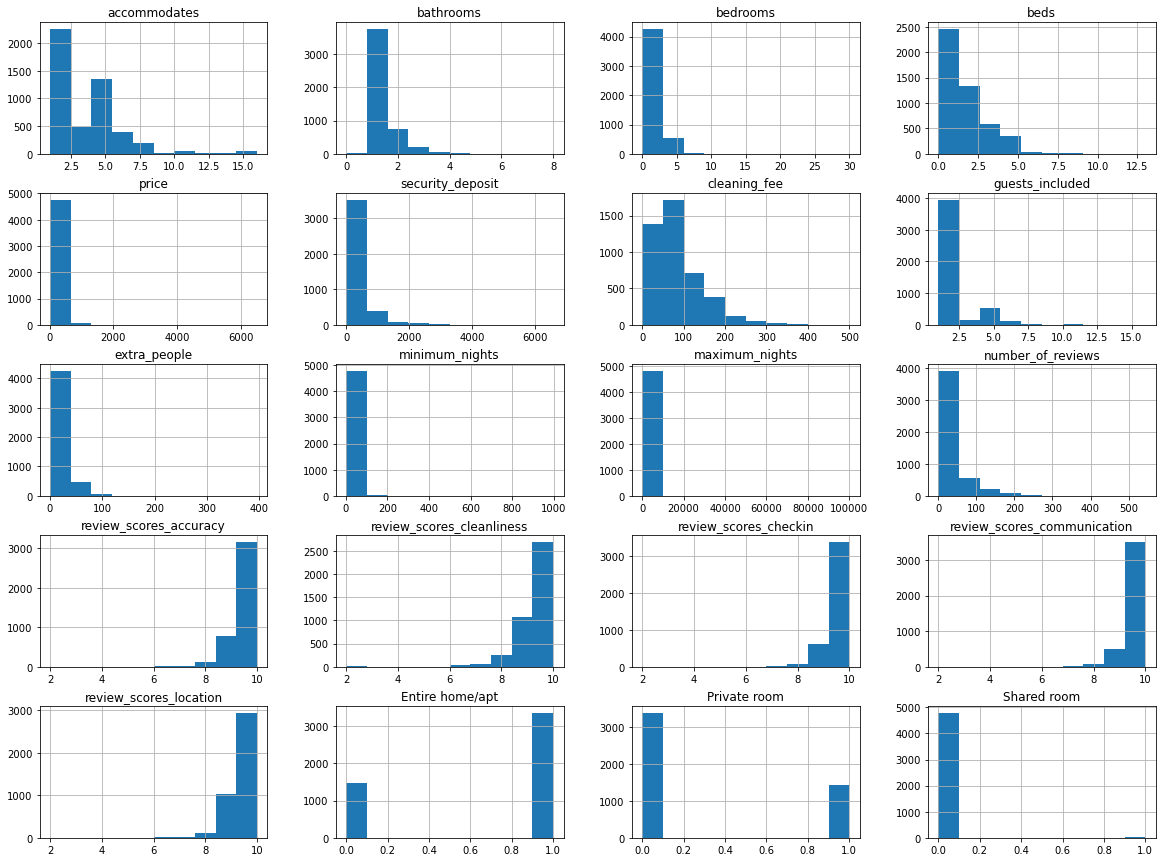

In [20]:
# Histograma de las variables
df.drop(columns=['latitude', 'longitude']).hist(figsize=(20,15))
plt.show()

## 1.3 Imputación de missings

In [21]:
# Valores missing
df.isnull().sum()

latitude                         0
longitude                        0
accommodates                     0
bathrooms                        0
bedrooms                         2
beds                             6
price                            0
security_deposit               785
cleaning_fee                   414
guests_included                  0
extra_people                     0
minimum_nights                   0
maximum_nights                   0
number_of_reviews                0
review_scores_accuracy         706
review_scores_cleanliness      705
review_scores_checkin          708
review_scores_communication    707
review_scores_location         708
Entire home/apt                  0
Private room                     0
Shared room                      0
dtype: int64

### 1.3.1 Variables 'bedrooms' y 'beds'

Para imputar los missing de las variables *bedrooms* y *beds* empleamos un modelo de regresión lineal donde las variables regresoras son *accommodates* y *bathrooms*.

In [22]:
# Librerias
from sklearn.linear_model import LinearRegression

En primer lugar, imputamos la variable **_bedrooms_**

In [23]:
# Separamos las variables
target = 'bedrooms'
regresoras = ['accommodates', 'bathrooms']

# Creamos un dataframe con las variables seleccionadas
df_imp = df[[target] + regresoras]

# Separamos los datos en dos dataframe, uno con los valores missing y otro sin valores missing
df_missing = df_imp[df_imp.isnull().any(axis=1)]
df_no_missing = df_imp.dropna()

# Ajustamos el modelo a los datos sin missing
reg = LinearRegression()
reg.fit(df_no_missing[regresoras], df_no_missing[target])

# Realizamos la imputacion de los valores missing y almacenamos los valores obtenidos en el dataframe 
pred = reg.predict(df_missing[regresoras])
df.loc[df[target].isnull(), target]= pred

Imputamos los missing en la variable **_beds_**

In [24]:
# Separamos las variables
target = 'beds'
regresoras = ['accommodates', 'bathrooms']

# Creamos un dataframe con las variables seleccionadas
df_imp = df[[target] + regresoras]

# Separamos los datos en dos dataframe, uno con los valores missing y otro sin valores missing
df_missing = df_imp[df_imp.isnull().any(axis=1)]
df_no_missing = df_imp.dropna()

# Ajustamos el modelo a los datos sin missing
reg = LinearRegression()
reg.fit(df_no_missing[regresoras], df_no_missing[target])

# Realizamos la imputacion de los valores missing y almacenamos los valores obtenidos en el dataframe 
pred = reg.predict(df_missing[regresoras])
df.loc[df[target].isnull(), target]= pred

### 1.3.2 Variables 'security_deposit' y 'cleaning_fee '

Consideramos que los valores NaN son 0, es decir, tendrían sentido y sería que no se paga depósito ni tasas de limpieza. 

In [25]:
df['security_deposit'] = df['security_deposit'].replace(np.nan, 0)
df['cleaning_fee'] = df['cleaning_fee'].replace(np.nan, 0)

### 1.3.3 Variables tipo 'review_scores_'

In [26]:
review_score = ['review_scores_accuracy','review_scores_cleanliness', 'review_scores_checkin',
                  'review_scores_communication','review_scores_location']

df[df[review_score].isna().any(axis=1)][review_score]

,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location
id,,,,,
48146,NaN,NaN,NaN,NaN,NaN
1126273,NaN,NaN,NaN,NaN,NaN
1229714,NaN,NaN,NaN,NaN,NaN
1620084,NaN,NaN,NaN,NaN,NaN
1660055,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...
32135798,NaN,NaN,NaN,NaN,NaN
32151243,NaN,NaN,NaN,NaN,NaN
32152929,NaN,NaN,NaN,NaN,NaN


Así, decidimos eliminar las observaciones

In [27]:
df = df.dropna(subset=review_score)

## 1.4 Outliers

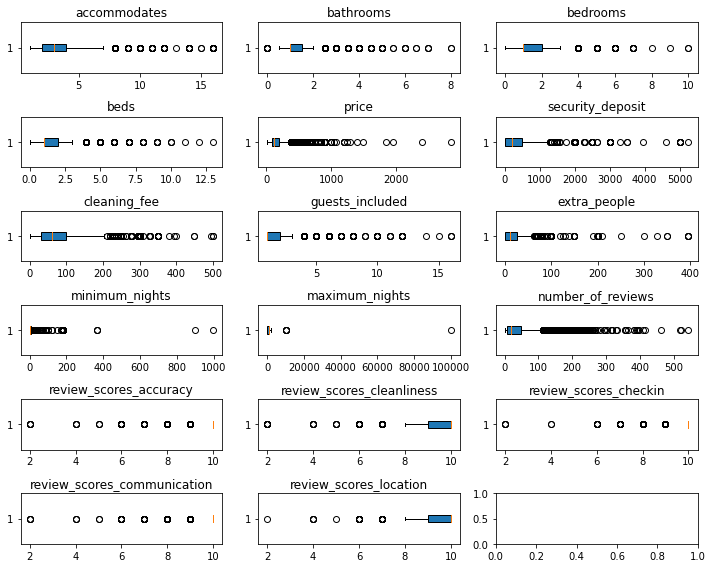

In [28]:
# Numero de filas y columnas necesarios para dibujar todos los boxplots
n_rows = 6
n_cols = 3
columnas = ['accommodates', 'bathrooms', 'bedrooms', 'beds', 'price', 'security_deposit', 'cleaning_fee','guests_included', 'extra_people', 'minimum_nights',
       'maximum_nights', 'number_of_reviews', 'review_scores_accuracy','review_scores_cleanliness', 'review_scores_checkin','review_scores_communication', 'review_scores_location']

# Matriz de subgraficos
fig, axs = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(10, 8))

# Boxplot de cada variable
for i, columna in enumerate(columnas):
    ax = axs[i // n_cols][i % n_cols]
    ax.boxplot(df[columna],vert=False,patch_artist=True) # boxplot de la variable
    ax.set_title(columna)

# Ajuste de espacios entre subgraficos
fig.tight_layout()

# Mostrar la figura
plt.show()

Estudiamos los outliers en conjunto con aquellas variables con las que podrían tener más relación. La relación entre las variables podemos estudiarla mediante la matriz de correlaciones

,latitude,longitude,accommodates,bathrooms,bedrooms,beds,price,security_deposit,cleaning_fee,guests_included,...,maximum_nights,number_of_reviews,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,Entire home/apt,Private room,Shared room
latitude,1.000000,-0.091854,-0.069610,-0.049372,-0.142905,-0.102692,0.099694,0.132790,0.161202,-0.061709,...,0.007066,0.079285,0.033667,0.017332,-0.050066,0.038948,0.200373,0.266724,-0.277306,0.044477
longitude,-0.091854,1.000000,-0.042908,-0.084609,-0.026113,-0.032282,-0.167960,-0.049751,-0.126247,-0.014581,...,-0.014911,0.056384,0.022181,0.037941,0.024320,0.016107,-0.280161,-0.054484,0.047656,0.037587
accommodates,-0.069610,-0.042908,1.000000,0.551257,0.811913,0.859015,0.561938,0.248548,0.521893,0.599349,...,0.015331,-0.049297,-0.071493,-0.026571,-0.030218,-0.020906,0.042239,0.417996,-0.409164,-0.062247
bathrooms,-0.049372,-0.084609,0.551257,1.000000,0.629066,0.535076,0.502955,0.270065,0.461937,0.355594,...,0.003912,-0.119025,-0.075141,-0.052964,-0.036348,-0.031953,0.036811,0.122795,-0.131523,0.040499
bedrooms,-0.142905,-0.026113,0.811913,0.629066,1.000000,0.800306,0.553985,0.246300,0.504547,0.539339,...,-0.007094,-0.105487,-0.056282,-0.029619,0.005699,-0.001051,0.021775,0.275593,-0.269652,-0.041650
beds,-0.102692,-0.032282,0.859015,0.535076,0.800306,1.000000,0.528422,0.231035,0.490845,0.564721,...,0.004134,-0.058611,-0.050218,-0.012845,0.008051,0.005718,0.027517,0.355815,-0.351145,-0.038200
price,0.099694,-0.167960,0.561938,0.502955,0.553985,0.528422,1.000000,0.292320,0.525051,0.390711,...,0.003870,-0.104884,0.012297,0.026779,-0.015980,0.026476,0.113195,0.351476,-0.345494,-0.044847
security_deposit,0.132790,-0.049751,0.248548,0.270065,0.246300,0.231035,0.292320,1.000000,0.405083,0.194235,...,0.044567,-0.049730,0.004476,0.044670,-0.017904,-0.007123,0.047932,0.231378,-0.226464,-0.034591
cleaning_fee,0.161202,-0.126247,0.521893,0.461937,0.504547,0.490845,0.525051,0.405083,1.000000,0.368321,...,0.021604,-0.126151,-0.017357,0.041147,-0.023045,0.002189,0.104090,0.431257,-0.422422,-0.062785
guests_included,-0.061709,-0.014581,0.599349,0.355594,0.539339,0.564721,0.390711,0.194235,0.368321,1.000000,...,0.008247,0.006298,-0.017860,0.015701,0.018058,0.015537,0.017516,0.269419,-0.263623,-0.040658


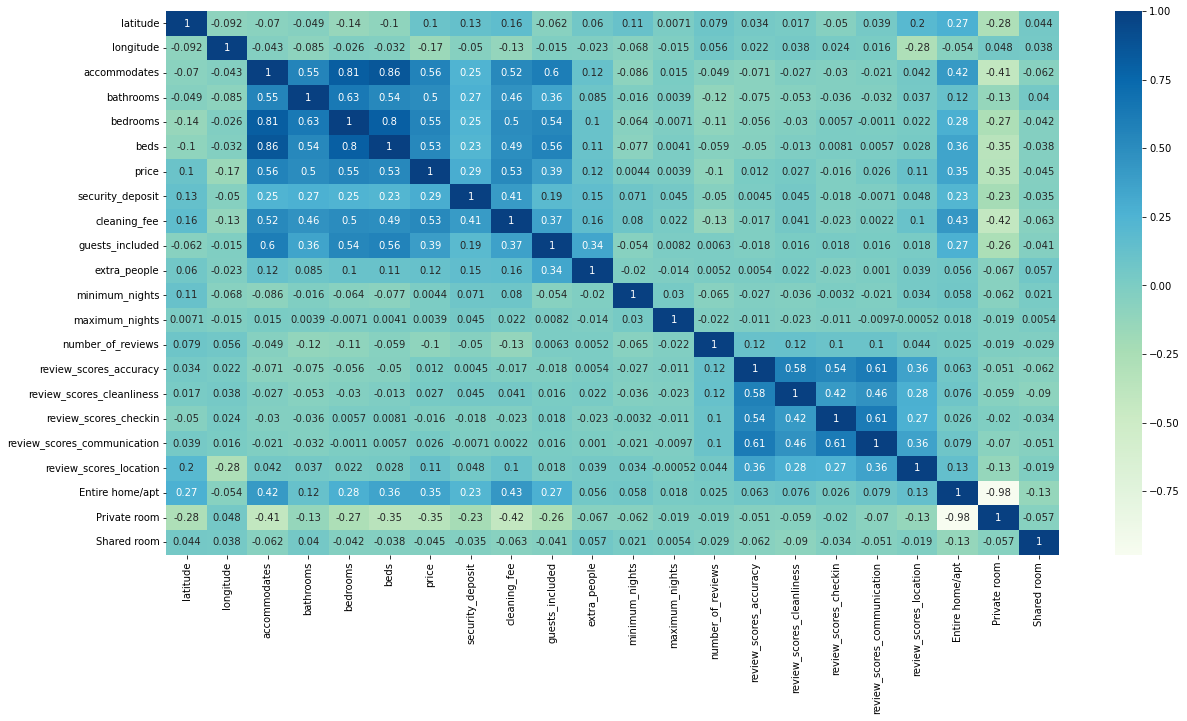

In [29]:
plt.figure(figsize=(20,10))
correlaciones= df.corr()
sns.heatmap(correlaciones,cmap="GnBu",annot=True) 
correlaciones

### 1.4.1 Variables relacionadas con la disposición del alojamiento

**Accommodate, bathrooms,  bedrooms, beds**

Primero vamos a estudiar los outliers en las variables relativas a la disposicion del alojamiento

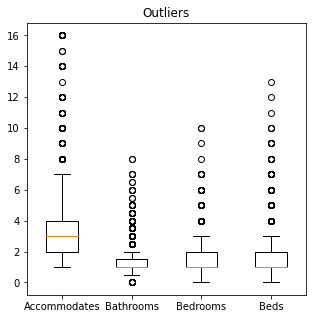

In [30]:
# Box plot de las habitaciones
fig = plt.figure(figsize = (5,5))

plt.boxplot(df[['accommodates', 'bathrooms','bedrooms', 'beds']])

plt.title('Outliers')
plt.xticks([1,2,3,4], ['Accommodates', 'Bathrooms', 'Bedrooms', 'Beds'])

plt.show()

Estudiamos los outliers en conjunto. Para ello empleamos la librería *PyOD* que posee estrategias para detectar outliers. En este caso, empleamos el algoritmo de KNN

In [31]:
# Librerias
from pyod.models.knn import KNN

In [32]:
# Deteccion de outliers
A = df[['accommodates','bathrooms','bedrooms', 'beds']]
clf = KNN(contamination=0.01)
clf.fit(A)
y_pred = clf.predict(A)
A[y_pred == 1]

,accommodates,bathrooms,bedrooms,beds
id,,,,
1096393,10,1.0,10.0,1.0
6830599,16,3.0,4.0,7.0
15735770,14,3.0,5.0,10.0
15987030,1,8.0,1.0,1.0
16606630,13,1.0,3.0,3.0
16689567,10,3.0,5.0,9.0
17347671,14,2.5,3.0,7.0
17848238,10,2.0,2.0,2.0
19589647,10,3.5,5.0,10.0


### 1.4.2 Variables relacionadas con tasas extra

**Cleaning fee, guest included, security deposit, extra people**

**Security deposit**

Veamos cómo se distribuye la variable

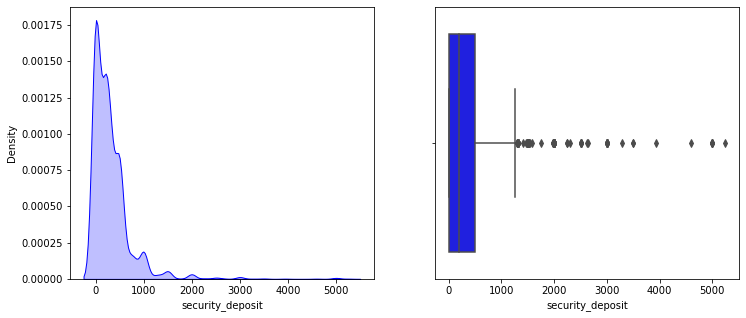

In [33]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.kdeplot(df['security_deposit'], shade=True, color='blue',ax=axes[0])
sns.boxplot(df['security_deposit'], color='blue', ax=axes[1])
plt.show()

Las fianzas altas suelen estar relacionadas con largas estancias o con lugares de grandes dimensiones. Veamos si se se dan estos casos.

In [34]:
df[df['security_deposit']>=500][df['minimum_nights']>30][['minimum_nights','price','security_deposit']]

,minimum_nights,price,security_deposit
id,,,
14508,90,140.0,1000.0
49736,31,1950.0,500.0
54261,90,98.0,1500.0
98242,31,56.0,1000.0
248014,31,80.0,800.0
...,...,...,...
23615592,31,199.0,2000.0
24719915,60,110.0,500.0
27230407,31,165.0,2000.0


Para poder comparar el tipo de alojamiento, tenemos que consultar la base de datos original

In [35]:
df_original[df_original['security_deposit']>=500][df_original['property_type']!='Condominium'][['price','security_deposit','property_type']]

,price,security_deposit,property_type
3,151.0,787.0,Apartment
7,140.0,1000.0,Apartment
10,135.0,500.0,House
16,110.0,500.0,Guest suite
20,300.0,500.0,Apartment
...,...,...,...
4808,125.0,500.0,Apartment
4810,150.0,500.0,Apartment
4813,94.0,787.0,Apartment
4818,91.0,500.0,Bed and breakfast


**Cleaning fee**

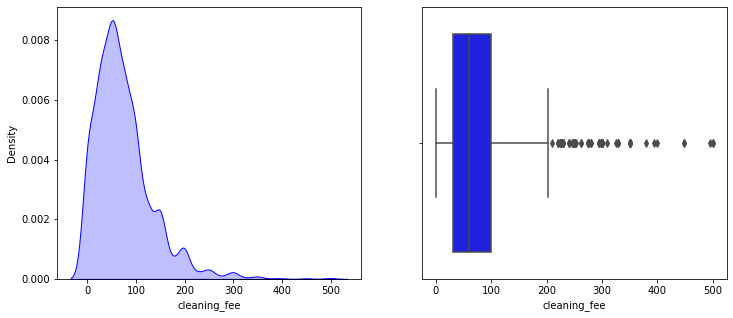

In [36]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.kdeplot(df['cleaning_fee'], shade=True, color='blue',ax=axes[0])
sns.boxplot(df['cleaning_fee'], color='blue', ax=axes[1])
plt.show()

Text(0, 0.5, 'Review Scores Cleanliness')

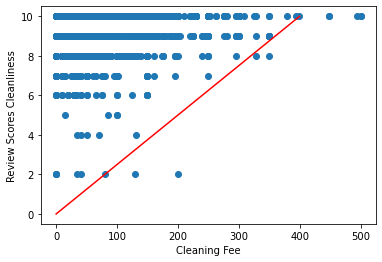

In [37]:
plt.scatter(df['cleaning_fee'],df['review_scores_cleanliness'])
plt.plot( [0, 400],  [0, 10] , color='red')
plt.xlabel('Cleaning Fee')
plt.ylabel('Review Scores Cleanliness')

**Guests included**

**Nota**: en conjunto con bed y accommodates

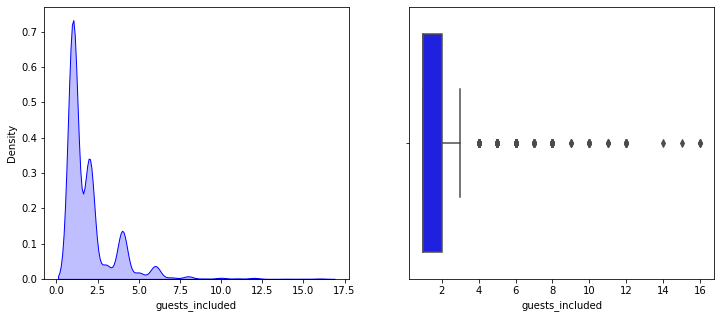

In [38]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.kdeplot(df['guests_included'], shade=True, color='blue',ax=axes[0])
sns.boxplot(df['guests_included'], color='blue', ax=axes[1])
plt.show()

In [39]:
df['guests_included'].value_counts() # Para ver valores atipicos de guests_included

1     2288
2     1059
4      425
3      121
6      114
5       55
8       23
7       13
10      10
12       9
11       4
16       3
9        3
15       1
14       1
Name: guests_included, dtype: int64

In [40]:
df[df['guests_included']>=10][['accommodates', 'bathrooms', 'bedrooms', 'beds', 'price',
                              'security_deposit', 'cleaning_fee', 'guests_included', 'extra_people']] # Para ver en conjunto

,accommodates,bathrooms,bedrooms,beds,price,security_deposit,cleaning_fee,guests_included,extra_people
id,,,,,,,,,
1032892,2,1.0,1.0,1.0,94.0,0.0,20.0,15,15.0
5698137,5,2.0,3.0,3.0,600.0,500.0,200.0,10,0.0
6830599,16,3.0,4.0,7.0,201.0,127.0,160.0,16,31.0
9811578,15,3.5,5.0,7.0,256.0,0.0,160.0,11,31.0
14090993,8,5.0,5.0,6.0,295.0,525.0,197.0,12,26.0
15646460,10,3.0,4.0,8.0,500.0,750.0,449.0,10,0.0
15735770,14,3.0,5.0,10.0,300.0,500.0,195.0,10,10.0
16339748,11,3.0,4.0,6.0,600.0,0.0,180.0,11,25.0
16689567,10,3.0,5.0,9.0,500.0,750.0,449.0,12,0.0


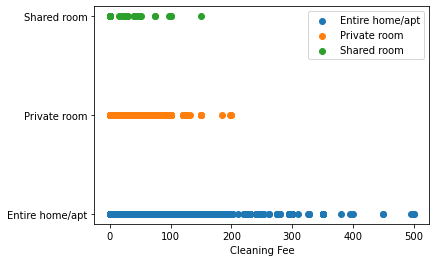

In [41]:
# Crear la figura y los ejes
fig, axs = plt.subplots()

# Tramar el gráfico de dispersión con diferentes categorías
axs.scatter(df[df['Entire home/apt'] == 1]['cleaning_fee'], [1] * len(df[df['Entire home/apt'] == 1]), label='Entire home/apt')
axs.scatter(df[df['Private room'] == 1]['cleaning_fee'], [2] * len(df[df['Private room'] == 1]), label='Private room')
axs.scatter(df[df['Shared room'] == 1]['cleaning_fee'], [3] * len(df[df['Shared room'] == 1]), label='Shared room')

# Añadir etiquetas a los ejes
axs.set_xlabel('Cleaning Fee')
axs.set_yticks([1, 2, 3])
axs.set_yticklabels(['Entire home/apt', 'Private room', 'Shared room'])

# Mostrar la leyenda
axs.legend()

# Mostrar el gráfico
plt.show()


**Extra people**

**Nota**:  en conjunto con bed y accommodates

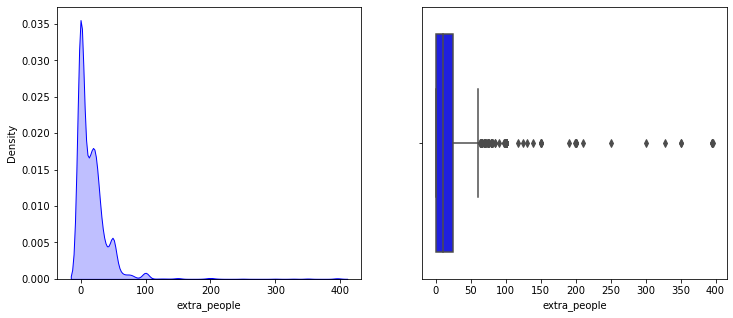

In [42]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.kdeplot(df['extra_people'], shade=True, color='blue',ax=axes[0])
sns.boxplot(df['extra_people'], color='blue', ax=axes[1])
plt.show()

### 1.4.3 Variables relacionadas las reseñas

**review_score_bla**

In [43]:
A = df[['review_scores_cleanliness','review_scores_checkin', 'review_scores_communication', 'review_scores_location']]
clf = KNN(contamination=0.01)
clf.fit(A)
y_pred = clf.predict(A)
A[y_pred == 1]

,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location
id,,,,
2695452,6.0,9.0,9.0,6.0
3603375,4.0,8.0,8.0,8.0
9201061,2.0,8.0,8.0,6.0
18192497,6.0,2.0,2.0,8.0
19662425,2.0,9.0,9.0,8.0
21192903,10.0,8.0,6.0,6.0
21344002,10.0,2.0,4.0,10.0
21830900,2.0,10.0,4.0,10.0
22032908,8.0,10.0,6.0,8.0


LAs reviews son muy subjetivas. Además, se pude dar el caso de que la peñita sea supermaja y la casa sea una guarrada.  La localizacion puede ser de 10 por tener unas vistas super exclusivas pero luego tener que llegar alli en burro bus y poner un cero en comunicacion

**IDEA:** ver las review por alojamiento

### 1.4.4 Variables relacionadas con las noches

**minimum**

Casos muy extremos

In [44]:
df[df['minimum_nights']>365][['minimum_nights','maximum_nights']]

,minimum_nights,maximum_nights
id,,
13771205,998,999
15819364,900,901


Estos son muy raros, se borran

In [45]:
df = df[(df['minimum_nights'] < 365)]

Resto de casos

<AxesSubplot:>

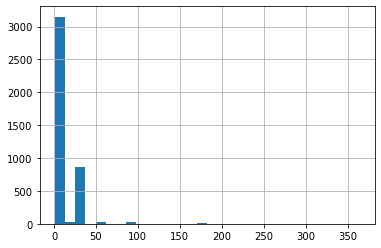

In [46]:
df['minimum_nights'].hist(bins=30)

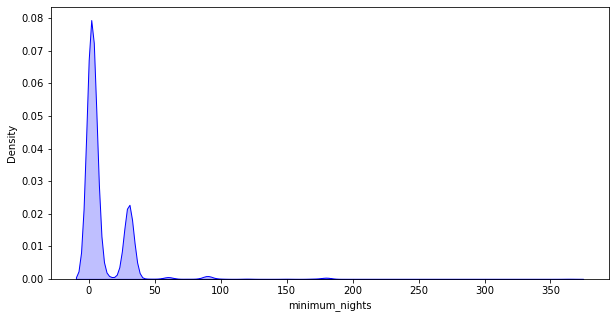

In [47]:
fig, ax = plt.subplots(1,figsize=(10, 5))

sns.kdeplot(df['minimum_nights'], shade=True, color='blue',ax=ax)

plt.show()

Parece haber dos picos, uno para alquileres por noche (min 1 noche) y otro para alquieres por meses (min 30 noche). En este caso si que parecetner sentido poder hacer el corte por arriba.

In [48]:
len(df[df['minimum_nights']>200]['minimum_nights'])

1

In [49]:
len(df[df['minimum_nights']>100]['minimum_nights'])

21

Se considera que pueden existir alquileres que exijan ciertos meses de peprmanencia. Por tanto, no se considera outlier ninguno de los anteriores casos

**maximum**

<AxesSubplot:>

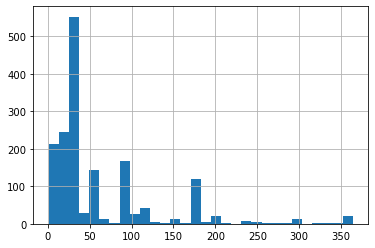

In [50]:
df[df['maximum_nights']<365]['maximum_nights'].hist(bins=30)

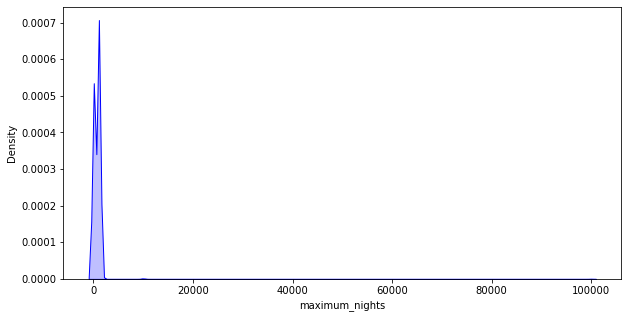

In [51]:
fig, ax = plt.subplots(1,figsize=(10, 5))

sns.kdeplot(df['maximum_nights'], shade=True, color='blue',ax=ax)

plt.show()

In [52]:
# Percentiles de 'maximum_nights'
q04 = df['maximum_nights'].quantile(0.4) 
q05 = df['maximum_nights'].quantile(0.5) 
q09 = df['maximum_nights'].quantile(0.9) 
print(q04,q05,q09)

# resulta que la mitad de las observaciones son 1125

360.0 1125.0 1125.0


In [53]:
len(df[df['maximum_nights']>1000]['maximum_nights'])# numero de observaciones con 'maximum_nights'=1125

2269

**NOTA:** nuestra intencion era ver el percentil 75 para afianzar el censurar a 365 dia. Al hacer esto, nos hemos dado cuenta de que la mitad de las observaciones estan a 'maximum_nights'=1125. Puede  que sea un valor por defecto?  El caso es que 

**NOTA:** Ara y Nuria piensan que poner todo a 365 es muy arriesgado pues estas imputando en la mtad de las observaciones. Casi seria mejor quitar la variable 

In [54]:
# por si se quiere hacer la imputacion
# df.loc[df['maximum_nights'] > 365, 'maximum_nights'] = 365

## Sucio

## Algunos gráficos interesantes

## Análisis de correlaciones

Para finalizar, estudiamos las correlaciones entre las variables. Así, podemos decidir qué variables usar para el modelo y estudiar posibles relaciones existentes entre ellas.

,latitude,longitude,accommodates,bathrooms,bedrooms,beds,price,security_deposit,cleaning_fee,guests_included,...,maximum_nights,number_of_reviews,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,Entire home/apt,Private room,Shared room
latitude,1.000000,-0.091652,-0.069425,-0.049176,-0.142728,-0.102495,0.099204,0.132979,0.161334,-0.061525,...,0.007031,0.079391,0.033589,0.017170,-0.050246,0.038805,0.200182,0.266795,-0.277392,0.044521
longitude,-0.091652,1.000000,-0.043395,-0.084939,-0.026416,-0.032778,-0.168330,-0.050142,-0.126477,-0.014989,...,-0.014772,0.056225,0.022081,0.038002,0.024569,0.016322,-0.279969,-0.054817,0.047996,0.037546
accommodates,-0.069425,-0.043395,1.000000,0.551207,0.811935,0.858967,0.565103,0.248337,0.521898,0.599235,...,0.015436,-0.049428,-0.071566,-0.026525,-0.030057,-0.020764,0.042490,0.418180,-0.409337,-0.062296
bathrooms,-0.049176,-0.084939,0.551207,1.000000,0.628987,0.535003,0.505572,0.269998,0.462010,0.355478,...,0.003953,-0.119144,-0.075129,-0.052853,-0.036180,-0.031804,0.037069,0.122912,-0.131639,0.040463
bedrooms,-0.142728,-0.026416,0.811935,0.628987,1.000000,0.800309,0.556812,0.246227,0.504631,0.539266,...,-0.007054,-0.105605,-0.056264,-0.029501,0.005877,-0.000897,0.022030,0.275794,-0.269844,-0.041695
beds,-0.102495,-0.032778,0.858967,0.535003,0.800309,1.000000,0.531493,0.230821,0.490852,0.564590,...,0.004236,-0.058754,-0.050273,-0.012775,0.008241,0.005884,0.027792,0.355982,-0.351302,-0.038251
price,0.099204,-0.168330,0.565103,0.505572,0.556812,0.531493,1.000000,0.294417,0.528065,0.393055,...,0.003740,-0.105080,0.011723,0.026114,-0.016526,0.026160,0.112973,0.352048,-0.346055,-0.044913
security_deposit,0.132979,-0.050142,0.248337,0.269998,0.246227,0.230821,0.294417,1.000000,0.404965,0.194050,...,0.044661,-0.049821,0.004520,0.044780,-0.017797,-0.007027,0.048103,0.231337,-0.226414,-0.034622
cleaning_fee,0.161334,-0.126477,0.521898,0.462010,0.504631,0.490852,0.528065,0.404965,1.000000,0.368299,...,0.021649,-0.126198,-0.017162,0.041343,-0.023014,0.002221,0.104173,0.431233,-0.422391,-0.062803
guests_included,-0.061525,-0.014989,0.599235,0.355478,0.539266,0.564590,0.393055,0.194050,0.368299,1.000000,...,0.008330,0.006187,-0.017889,0.015779,0.018226,0.015684,0.017755,0.269536,-0.263731,-0.040701


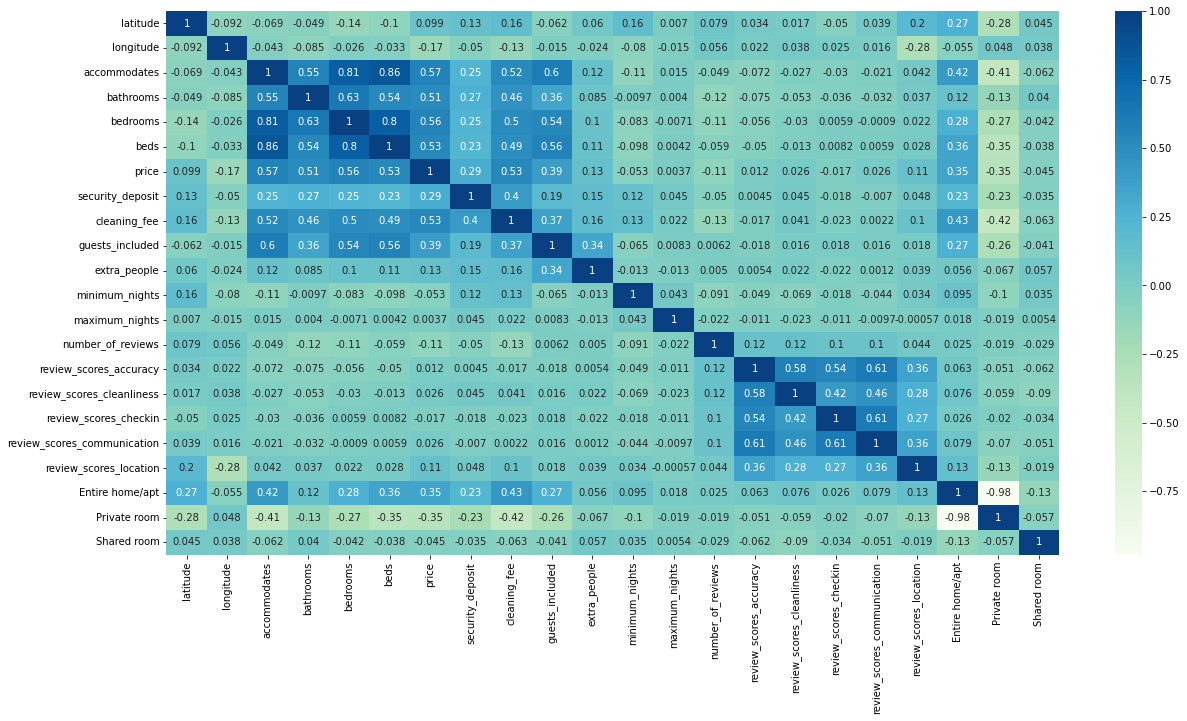

In [55]:
plt.figure(figsize=(20,10))
correlaciones= df.corr()
sns.heatmap(correlaciones,cmap="GnBu",annot=True) 
correlaciones

Así, seleccionamos las siguientes variables para el modelo:
Las variables de modelización:
* _bedrooms_ 
* _bathrooms_ 
* _sqft_living_
* _sqft_lot_
* _view_
* _condition_
* _grade_
* _lat_
* _long_

Además, podemos considerar crear dos variables. Por un lado, *bed&bath*, que incluya en una única variable el número de baños y habitaciones de la casa (pues tienen una alta correlación). Por otro lado, podría ser más interesante trabajar con una variable que definimos como *total_yrs* = *current_year* (2023) - *yr_built*

Y la varibale de etiqueta:
* _logPrice_

Así, nos queda el siguiente DataFrame

In [56]:
# Creamos las nuevas variables
bed_and_bath = df['bedrooms'] + df['bathrooms']
total_yrs = 2023 - df['yr_built']

KeyError: 'yr_built'

In [ ]:
# DataFrame final 
df = df.drop(columns=['date','bedrooms','bathrooms','floors','waterfront','grade','sqft_above','sqft_basement','yr_built','zipcode','sqft_living15','sqft_lot15','geometry'], axis = 1)
df['bed_and_bath'] = bed_and_bath
df['total_yrs'] = total_yrs
df.head()

# 2. División de los datos

In [ ]:
# Paquetes y liberias
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

En primer lugar, creamos la matriz de observaciones y el vector etiqueta con los que trabajaremos para ajustar el modelo de regresión lineal.

In [ ]:
# Vector etiqueta
y = df['price']

# Matriz de observaciones
X = df.drop('price',axis=1)

In [ ]:
# Variables dummy para view y condition (son categoricas)
X = pd.get_dummies(X, columns=['view', 'condition'], drop_first=True)

In [ ]:
# Estandarizamos los datos
objeto = StandardScaler()
X_ss = pd.DataFrame(objeto.fit_transform(X.iloc[:,0:6]), columns=list(X.iloc[:,0:6].columns))
# Concatenamos los datos
X = pd.concat([X_ss, X.loc[:,'view_1':'condition_5'].reset_index()], axis=1)
X.head(5)

Para ajustar los distintos modelos tenemos 2 opciones:
1. Plantear un problema de regresión donde la variable *y* es de tipo continuo
2. Plantear un problema de clasificación donde agrupamos en diferentes cluster los valores de la variable *y*

In [ ]:
# Realizamos un describe para saber como separar los datos
y.describe()

In [ ]:
# Problema de clasificacion
y_clas = pd.qcut(y, 3, labels=False)

# Hallamos los rangos de valores para las diferentes categorias
quantiles = pd.qcut(y, 3).unique().sort_values()
print(quantiles)

Donde las clases serían:
$0:\text{Barato} \in (11.224, 12.78]$;
$1:\text{Medio} \in (12.78, 13.218]$;
$2:\text{Caro} \in (13.218, 14.897]$

Separamos los datos en train y test

In [ ]:
X_train, X_test, y_train, y_test, y_train_clas, y_test_clas = train_test_split(X, y, y_clas, test_size=0.3, random_state=0)

In [ ]:
# Librerias
import os

# Carpeta con datos
if not os.path.exists('Datos'):
    os.makedirs('Datos')
    
# Guardamos los datos
X_train.to_csv('Datos/X_train.csv', index=False)
X_test.to_csv('Datos/X_test.csv', index=False)
y_train.to_csv('Datos/y_train.csv', index=False)
y_test.to_csv('Datos/y_test.csv', index=False)
y_train_clas.to_csv('Datos/y_train_clas.csv', index=False)
y_test_clas.to_csv('Datos/y_test_clas.csv', index=False)